In [ ]:
!pip install yfinance

In [15]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Simple Linear Regression with Gradient Descent Algorithm
class LinearRegression:
    def __init__(self, df, learning_rate=0.0001, stop=1e-6, normalize=True):
        self.m = 0
        self.c = 0
        self.__df = df
        self.__lr = learning_rate
        self.__stop = stop
        self.__normalize = normalize
        self.__n = None
        self.__mean = None
        self.__std = None
        self.__costs = []
        self.__iterations = []

    def __computeCost(self, y_predict, y):
        loss = np.square(y_predict - y)
        cost = np.sum(loss) / (2 * self.__n)
        return cost

    def __optimize(self, x, y):
        y_predict = np.dot(x, self.m) + self.c
        dm = np.dot(x, (y_predict - y)) / self.__n
        dc = np.sum(y_predict - y) / self.__n
        self.m = self.m - self.__lr * dm
        self.c = self.c - self.__lr * dc

    def __normalizeX(self, x):
        return (x - self.__mean) / self.__std

    def fit(self):
        split = int(len(self.__df) * 0.75)
        train = self.__df[:split]

        x_train = np.array(train['Open'])
        y_train = np.array(train['Close'])

        if self.__normalize:
            self.__mean, self.__std = x_train.mean(axis=0), x_train.std(axis=0)
            x_train = self.__normalizeX(x_train)

            self.__n = len(x_train)
            last_cost, i = float('inf'), 0
            while True:
                y_predict = np.dot(x_train, self.m) + self.c
                cost = self.__computeCost(y_predict, y_train)
                self.__optimize(x_train, y_train)
                if last_cost - cost < self.__stop:
                    break
                else:
                    last_cost, i = cost, i + 1
                    self.__costs.append(cost)
                    self.__iterations.append(i)

    def predict(self):
        # pred = pd.DataFrame({'Date': self.__df['Date'], 'Value': self.__df['Close'], 'Predicted_Values': slr_pred})
        split = int(len(self.__df) * 0.75)
        train = self.__df[:split]
        test = self.__df[split:]
        if self.__normalize:
            x = self.__normalizeX(test['Open'])
        slr_pred = np.dot(x, self.m) + self.c
        plt.plot(self.__df['Date'], self.__df['Close'])
        plt.plot(test['Date'], slr_pred)
        plt.show()

[*********************100%***********************]  1 of 1 completed


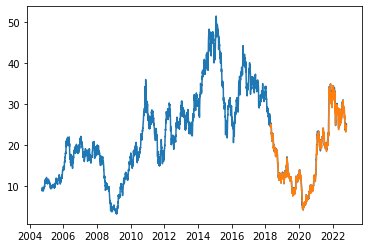

In [29]:
df = yf.download("TTM").reset_index()
df.index = df['Date']
# df = df.dropna()
slr = LinearRegression(df)
slr.fit()
slr.predict()